In [1]:
import config
import numpy as np
import pandas as pd

# Baseline: Training datasets and store
- Time 1 (1 day)
- Time 10 (3 days)
- Time 14 (4 days)
- Time 18 (5 days)
- Time 22 (6 days)

In [2]:
import Test_without_Training

if __name__ == "__main__":
    for K in [1, 6, 10, 14, 18, 22, 26, 30, 34]:
        trainer = Test_without_Training.TremorModelTrainer(config, subject="Hunmin")
        trainer.run_all_sessions_training_K_data(K)
        df = trainer.save_results(f'../Results/Baseline_results_train_with_{K}data_H.csv')

# 저장해놨어서 데이터 업데이트 전에 한번 돌리면 굳이 안돌려도 됨

Dataset 1/42 - Session Exp_2025-05-27/E8331D05289A/
(8539, 4, 14, 1) (8539,)
Dataset 2/42 - Session Exp_2025-06-18/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 91.67%
Maximum validation accuracy : 96.51%
Accuracy of test dataset using model V0: 95.3488%
Dataset 3/42 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 79.0987%
Dataset 4/42 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 85.5103%
Dataset 5/42 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/
Accuracy on unseen dataset: 84.8966%
Dataset 6/42 - Session Exp_2025-06-20-v4/E9AD0E7DCC2B/
Accuracy on unseen dataset: 70.6175%
Dataset 7/42 - Session Exp_2025-06-20-v5/E9AD0E7DCC2B/
Accuracy on unseen dataset: 73.5972%
Dataset 8/42 - Session Exp_2025-06-20-v6/E9AD0E7DCC2B/
Accuracy on unseen dataset: 77.6491%
Dataset 9/42 - Session Exp_2025-06-20-v7/E9AD0E7DCC2B/
Accuracy on unseen dataset: 70.9670%
Dataset 10/42 - Session Exp_2025-0

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/hml76/OneDrive/문서/MATLAB/Data_Hunmin/Exp_2025-07-03-v1/E9AD0E7DCC2B//raw/1/'

In [3]:
b_path = 'C:/Users/hml76/PycharmProjects/Tremor_project_local/NCI_mindforce'
baseline_K = ['1', '6', '10', '14', '18', '22', '26', '30', '34']
baselines = []

for idx, K in enumerate(baseline_K):
    baselines.append(b_path + f'/github/Results/Baseline_results_train_with_{K}data_H.csv')

SUBJECT = "Hunmin"

# Training from scratch in every data
- Performance should be high
- Objective


Dataset 1/38 - Session Exp_2025-05-27/E8331D05289A/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 87.34%
Maximum validation accuracy : 93.62%

Dataset 2/38 - Session Exp_2025-06-18/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 84.76%
Maximum validation accuracy : 91.12%

Dataset 3/38 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 82.04%
Maximum validation accuracy : 90.99%

Dataset 4/38 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 82.84%
Maximum validation accuracy : 90.9%

Dataset 5/38 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 85.8%
Maximum validation accura

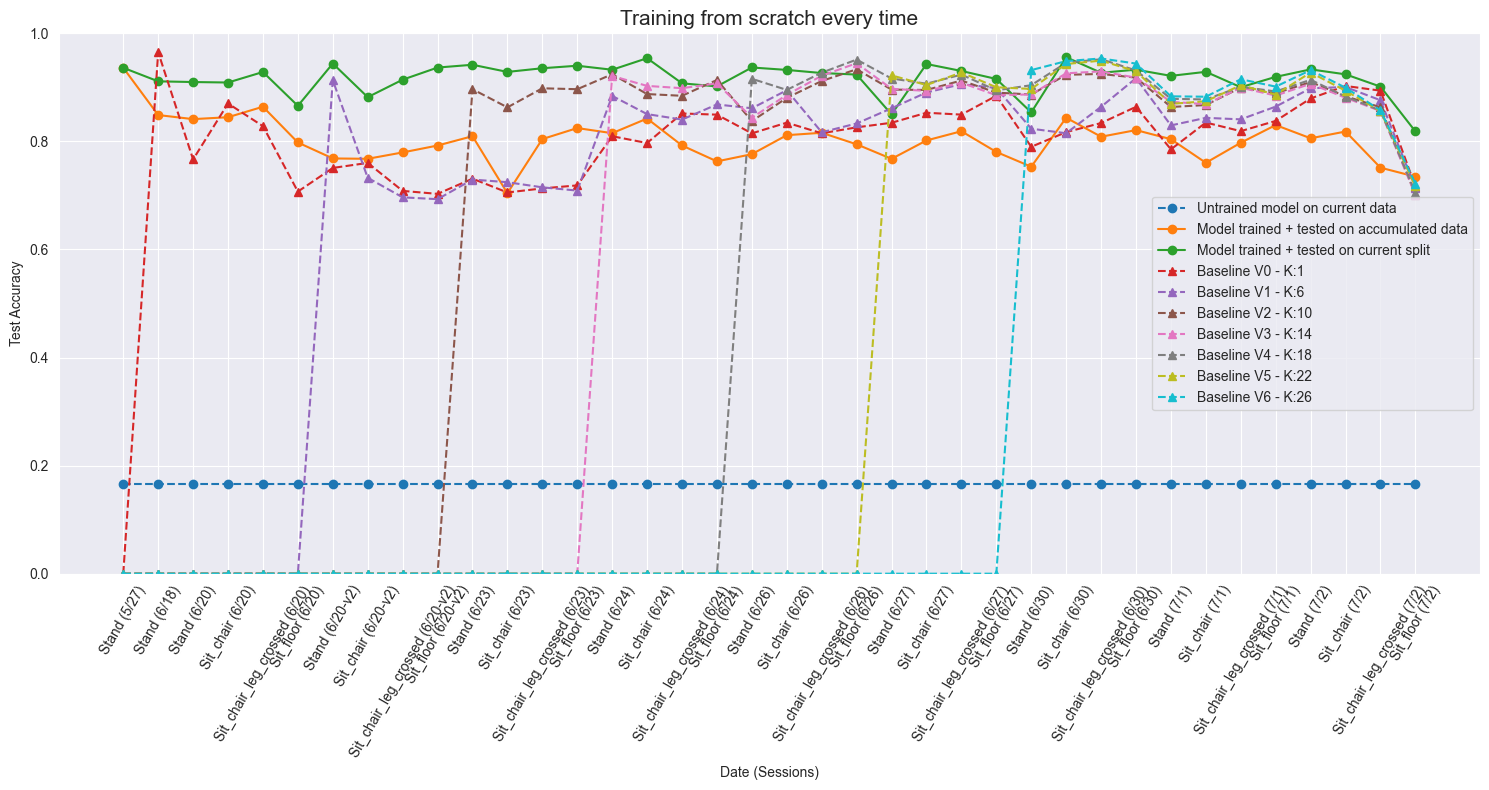

Average of acc without training anything (should be random): 11.03%
Average of acc using previous test data after training: 91.72%
Average of acc using current test data after training: 80.25%
Baseline K-1: 80.87%
Baseline K-6: 82.83%
Baseline K-10: 88.76%
Baseline K-14: 88.93%
Baseline K-18: 89.86%
Baseline K-22: 89.39%
Baseline K-26: 89.76%


In [4]:
import Training_from_scratch

prog_trainer = Training_from_scratch.ProgressiveTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = prog_trainer.run(plot_learning_curve=False)
prog_trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")
for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):])):.2f}%")

# Transfer Learning - Incremental : Model is cumulatively updated


Dataset 1/38 - Session Exp_2025-05-27/E8331D05289A/
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 86.22%
Maximum validation accuracy : 94.18%

Dataset 2/38 - Session Exp_2025-06-18/E9AD0E7DCC2B/

Initial Test Accuracy: 83.88%
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 81.83%
Maximum validation accuracy : 84.9%
Accuracy Improvement: 1.02%
	 ===> Positive

Dataset 3/38 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/

Initial Test Accuracy: 82.93%
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 78.76%
Maximum validation accuracy : 85.28%
Accuracy Improvement: 2.35%
	 ===> Positive

Dataset 4/38 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/

Initial Test Accuracy: 90.29%
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 83.6%
Maximum validation accuracy : 90.62%
Accuracy Improvement: 0.33%
	 =

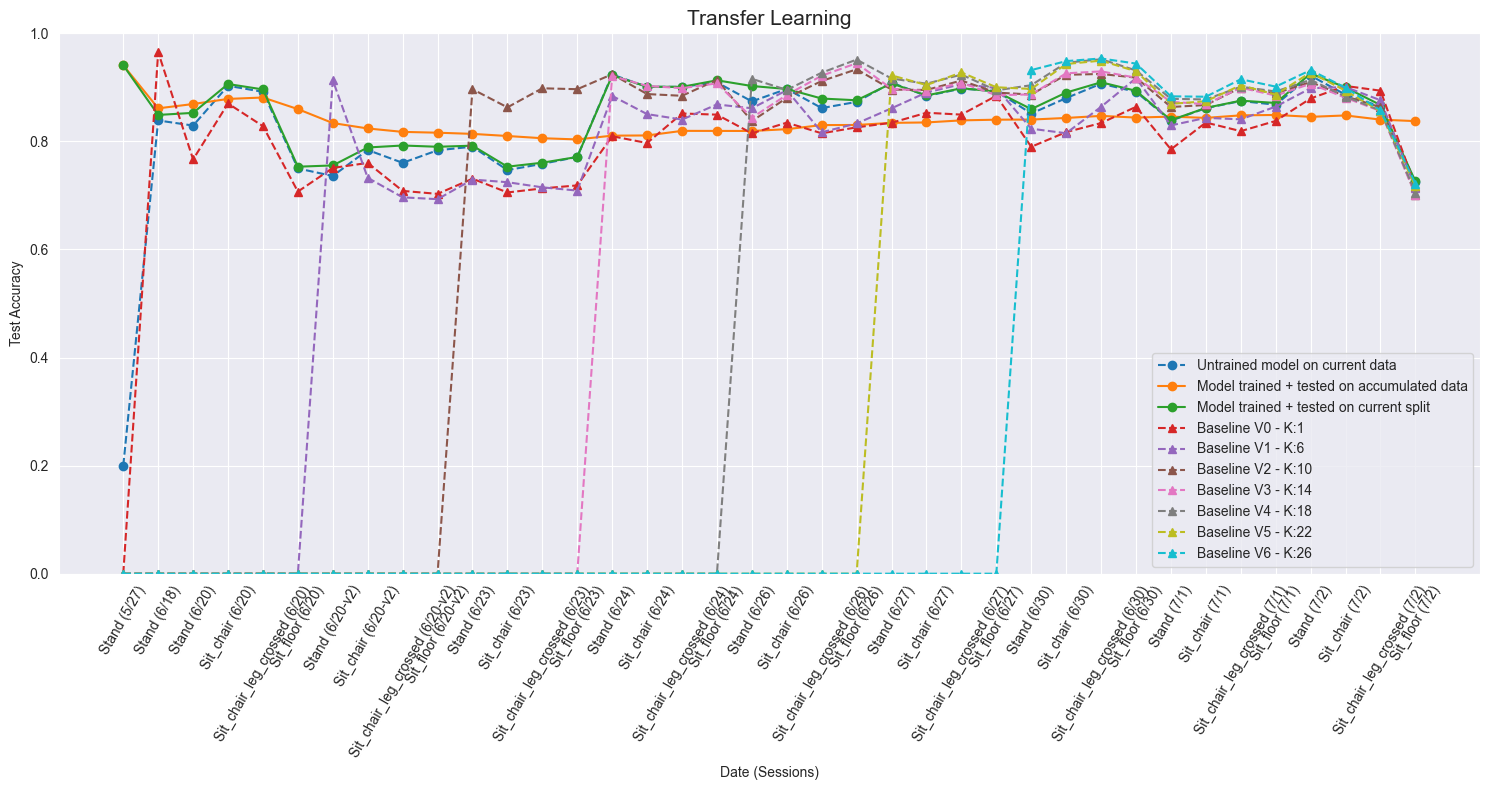

Average of acc without training this data (init; unseen) - incrementally trained model with previous datasets: 83.26%
Average of acc using previous test data after training (with increment): 83.84%
Average of acc using current test data after training (with increment): 85.78%
Baseline K-1: 80.87%
Baseline K-6: 82.83%
Baseline K-10: 88.76%
Baseline K-14: 88.93%
Baseline K-18: 89.86%
Baseline K-22: 89.39%
Baseline K-26: 89.76%


In [5]:
import Transfer_Learning

tl_trainer = Transfer_Learning.TransferLearningTrainer(config, subject=SUBJECT, increment_true_false="True")
Init_acc_all, Prev_acc_all, Trained_acc_all = tl_trainer.run(plot_learning_curve=False)   #True if want to see convergence for each session round
tl_trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training this data (init; unseen) - incrementally trained model with previous datasets: {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training (with increment): {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training (with increment): {np.mean(x)*100:.2f}%")

for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):])):.2f}%")

# Few-shot Learning (MAML) adaptation

Dataset 1/38 - Session Exp_2025-05-27/E8331D05289A/
Epoch 1: Loss=1.5693, Acc=0.5800
Epoch 11: Loss=0.8497, Acc=0.6900
Epoch 21: Loss=0.9453, Acc=0.7500
Epoch 31: Loss=1.0374, Acc=0.7600
Epoch 41: Loss=1.1181, Acc=0.7500
Dataset 2/38 - Session Exp_2025-06-18/E9AD0E7DCC2B/
Dataset 3/38 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/
Dataset 4/38 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/
Dataset 5/38 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/
Dataset 6/38 - Session Exp_2025-06-20-v4/E9AD0E7DCC2B/
Dataset 7/38 - Session Exp_2025-06-20-v5/E9AD0E7DCC2B/
Dataset 8/38 - Session Exp_2025-06-20-v6/E9AD0E7DCC2B/
Dataset 9/38 - Session Exp_2025-06-20-v7/E9AD0E7DCC2B/
Dataset 10/38 - Session Exp_2025-06-20-v8/E9AD0E7DCC2B/
Dataset 11/38 - Session Exp_2025-06-23-v1/E9AD0E7DCC2B/
Dataset 12/38 - Session Exp_2025-06-23-v2/E9AD0E7DCC2B/
Dataset 13/38 - Session Exp_2025-06-23-v3/E9AD0E7DCC2B/
Dataset 14/38 - Session Exp_2025-06-23-v4/E9AD0E7DCC2B/
Dataset 15/38 - Session Exp_2025-06-24-v1/E9AD0E7DCC2B/
Datase

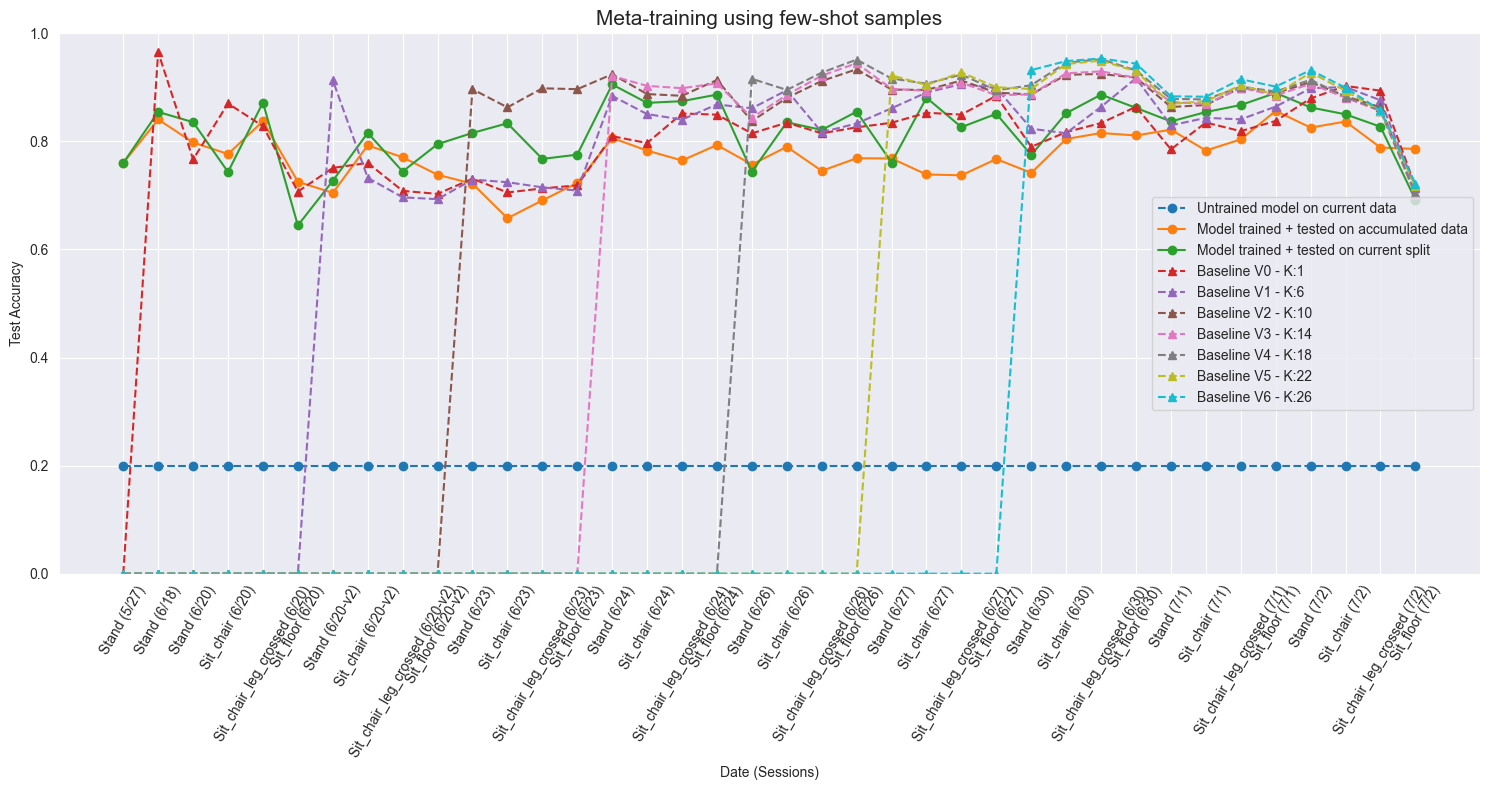

Average of acc without training anything (should be random): 20.00%
Average of acc using previous test data after training: 77.46%
Average of acc using current test data after training: 81.98%
Baseline K-1: 80.87%
Baseline K-6: 82.83%
Baseline K-10: 88.76%
Baseline K-14: 88.93%
Baseline K-18: 89.86%
Baseline K-22: 89.39%
Baseline K-26: 89.76%


In [6]:
import Few_shot_Learning

trainer = Few_shot_Learning.MAMLProgressiveTrainer(config, subject=SUBJECT, K_shot=10, query_size=100)
Init_acc_all, Prev_acc_all, Trained_acc_all = trainer.run()
trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")

for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):])):.2f}%")

# Continual Learning (EWC)

Dataset 1/38 - Session Exp_2025-05-27/E8331D05289A/
Start Training (total epochs: 20)...
Finish Training! (Model is saved)
Maximum training accuracy : 87.38%
Maximum validation accuracy : 93.62%
Dataset 2/38 - Session Exp_2025-06-18/E9AD0E7DCC2B/
Dataset 3/38 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/
Dataset 4/38 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/
Dataset 5/38 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/
Dataset 6/38 - Session Exp_2025-06-20-v4/E9AD0E7DCC2B/
Dataset 7/38 - Session Exp_2025-06-20-v5/E9AD0E7DCC2B/
Dataset 8/38 - Session Exp_2025-06-20-v6/E9AD0E7DCC2B/
Dataset 9/38 - Session Exp_2025-06-20-v7/E9AD0E7DCC2B/
Dataset 10/38 - Session Exp_2025-06-20-v8/E9AD0E7DCC2B/
Dataset 11/38 - Session Exp_2025-06-23-v1/E9AD0E7DCC2B/
Dataset 12/38 - Session Exp_2025-06-23-v2/E9AD0E7DCC2B/
Dataset 13/38 - Session Exp_2025-06-23-v3/E9AD0E7DCC2B/
Dataset 14/38 - Session Exp_2025-06-23-v4/E9AD0E7DCC2B/
Dataset 15/38 - Session Exp_2025-06-24-v1/E9AD0E7DCC2B/
Dataset 16/38 - Session Exp_2025

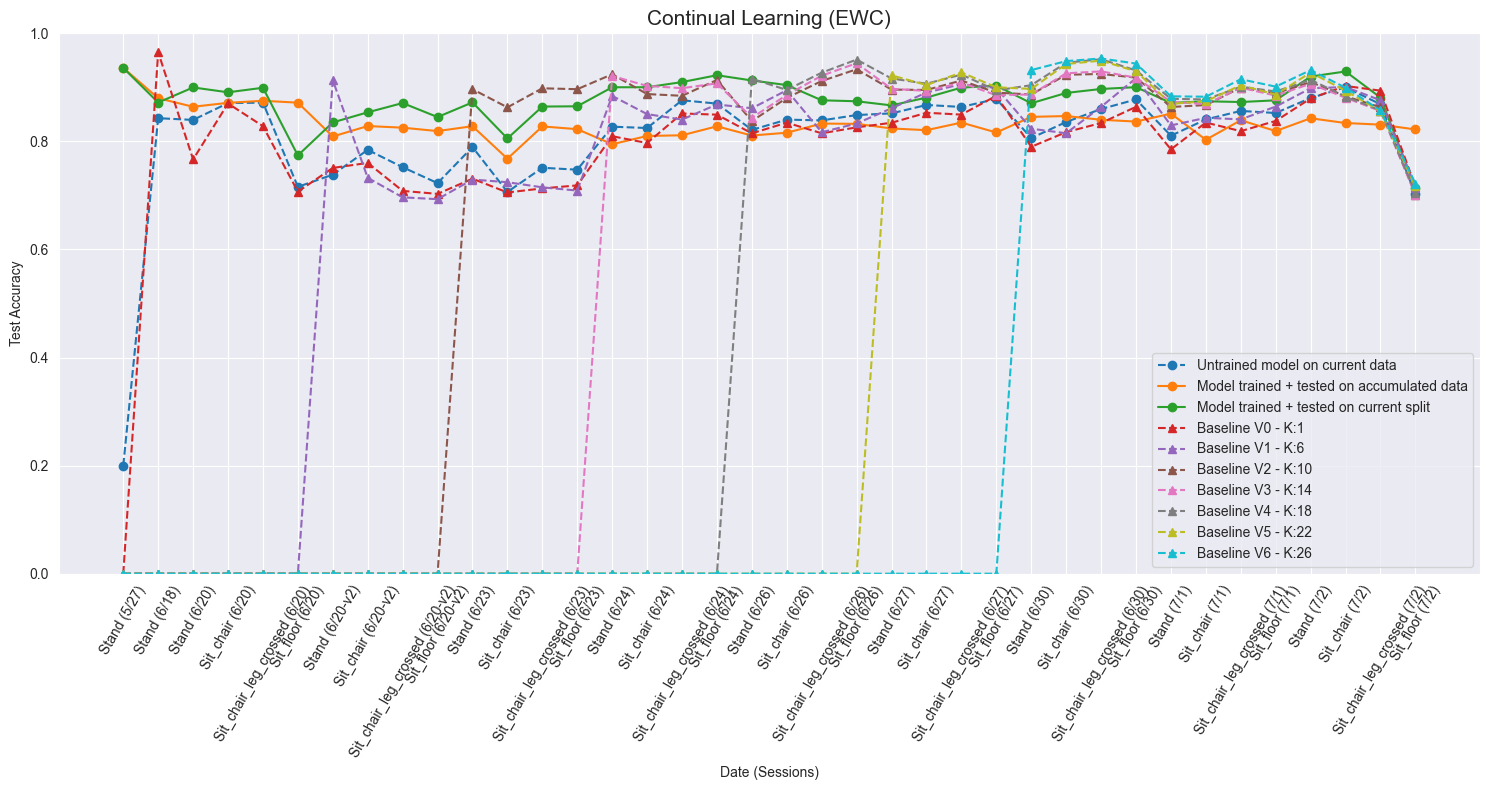

Average of acc without training this data (init; unseen): 80.62%
Average of acc using previous test data after training: 83.35%
Average of acc using current test data after training: 87.72%
Baseline K-1: 80.87%
Baseline K-6: 82.83%
Baseline K-10: 88.76%
Baseline K-14: 88.93%
Baseline K-18: 89.86%
Baseline K-22: 89.39%
Baseline K-26: 89.76%


In [7]:
import Continual_Learning_EWC_

cl_trainer = Continual_Learning_EWC_.ContinualLearningTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = cl_trainer.run()
cl_trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training this data (init; unseen): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")

for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):])):.2f}%")